In [19]:
from data import data_generation, batch_creator, gp_kernels
import sklearn.gaussian_process as gp 
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
pad_pos_tr, pad_pos_te, pad_y_fren_tr, pad_y_fren_te, _, df_te = data_generation.data_generator_for_gp_mimick_gpt(50000, gp_kernels.rbf_kernel)

In [3]:
indices_tr = np.random.choice(np.arange(0, len(pad_pos_tr.reshape(-1)), 1), 10000)
x_tr = pad_pos_tr.reshape(-1)[indices_tr]; y_tr = pad_y_fren_tr.reshape(-1)[indices_tr]

### Interpolation task:

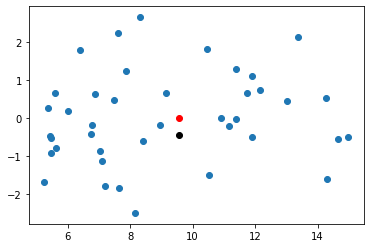

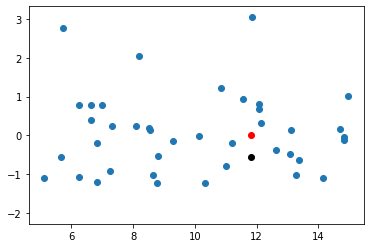

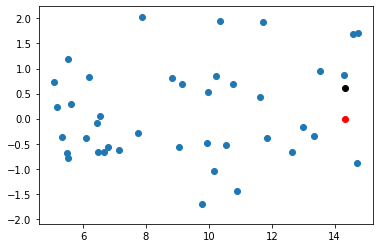

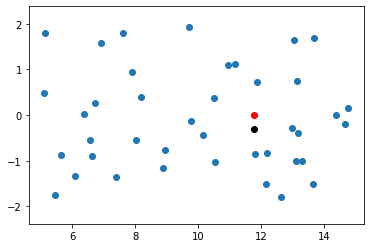

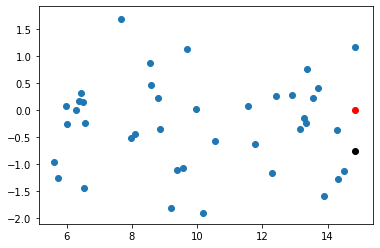

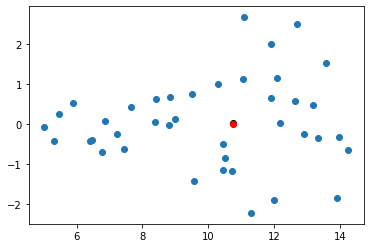

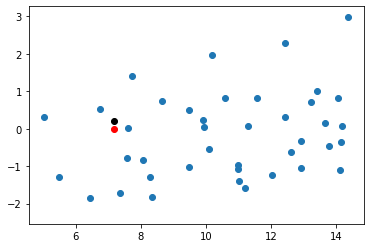

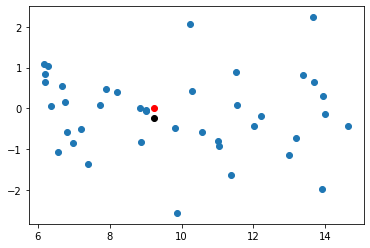

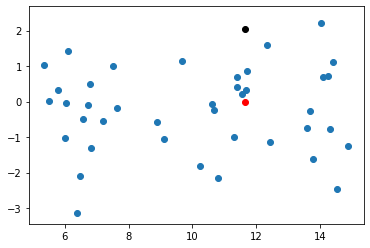

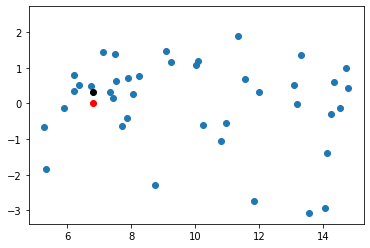

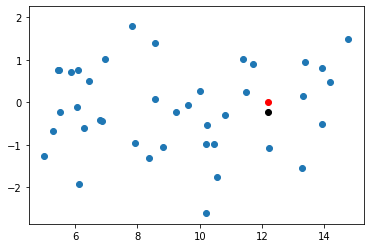

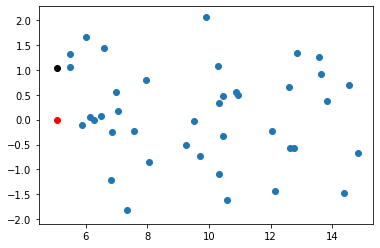

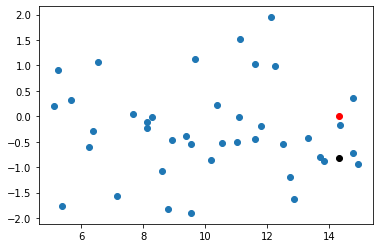

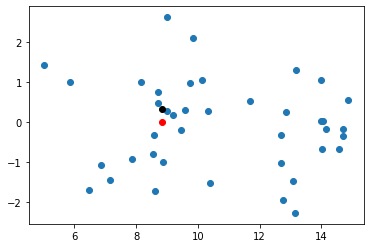

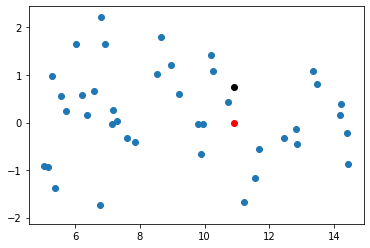

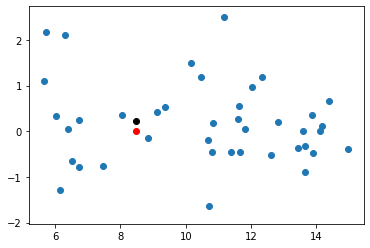

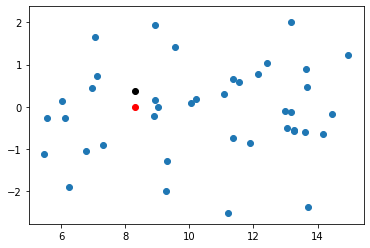

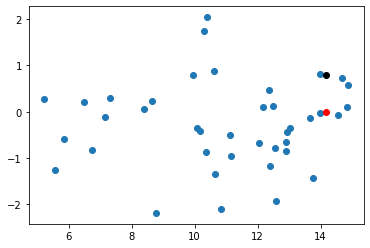

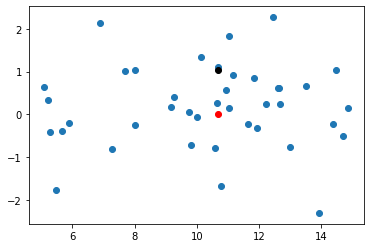

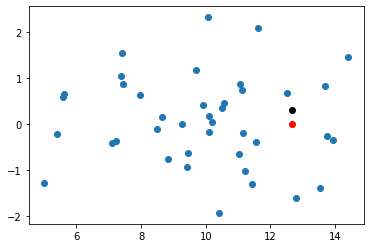

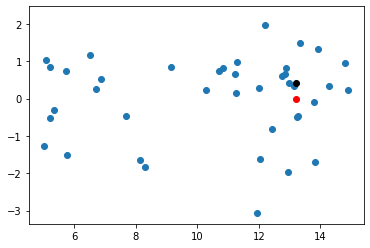

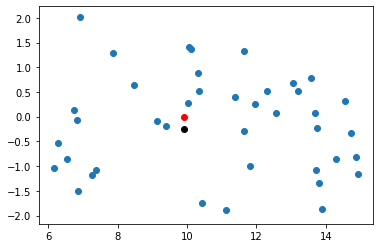

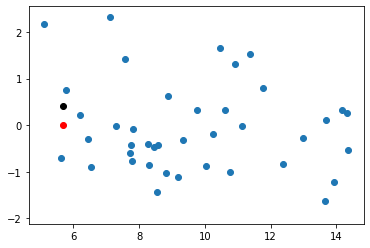

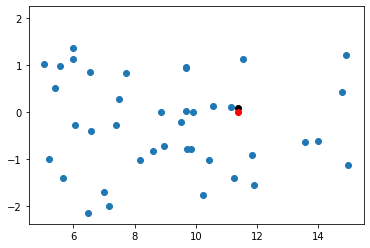

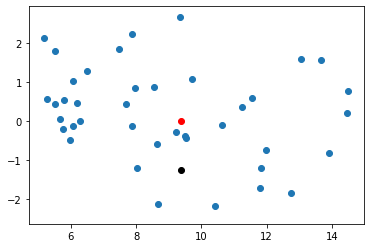

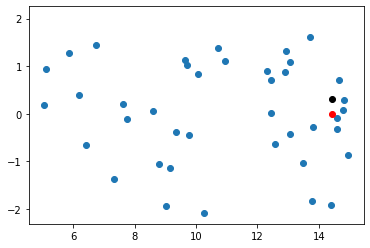

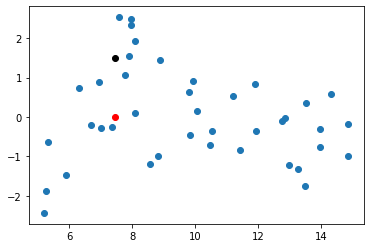

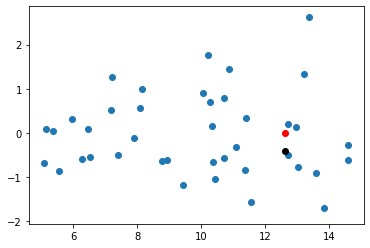

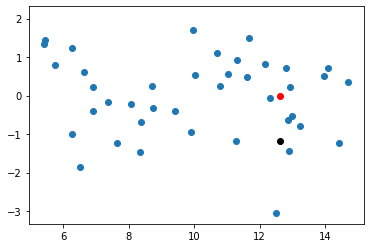

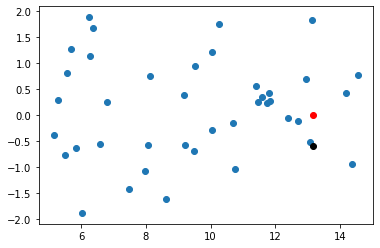

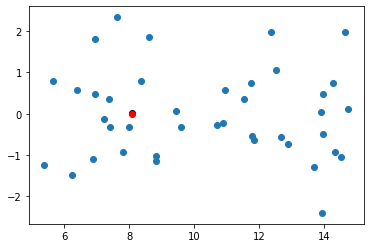

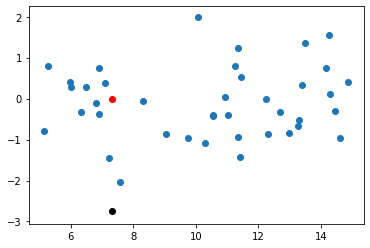

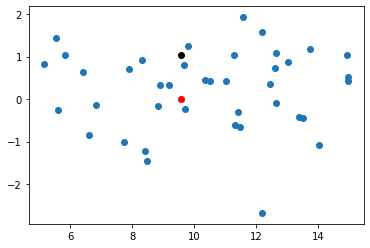

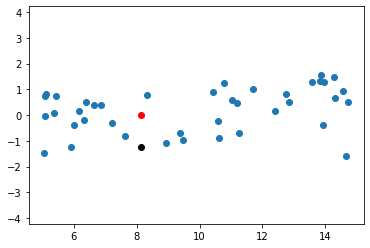

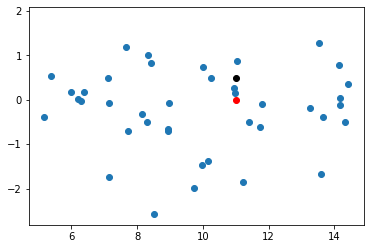

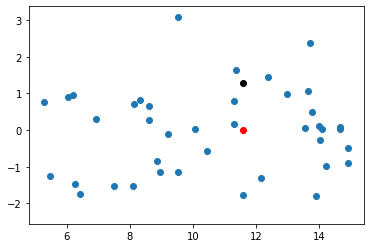

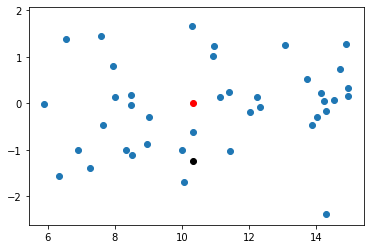

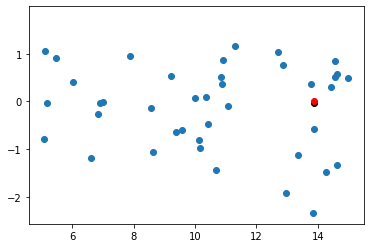

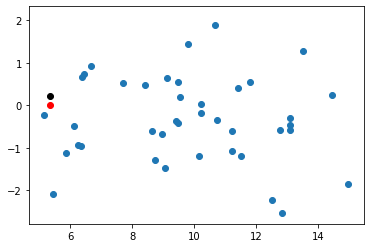

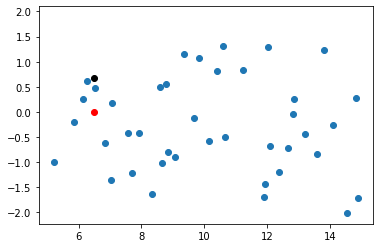

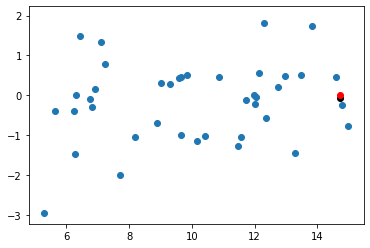

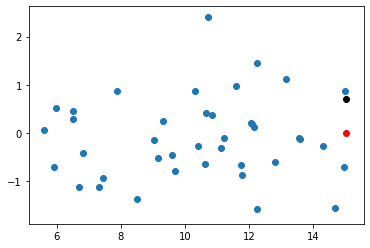

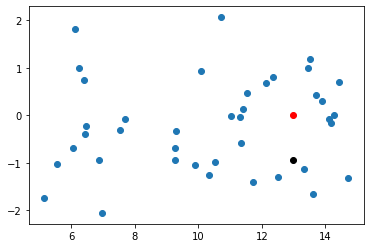

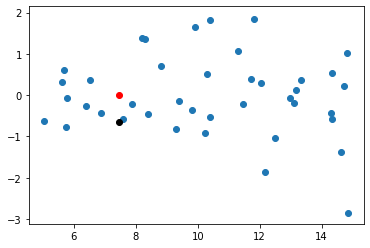

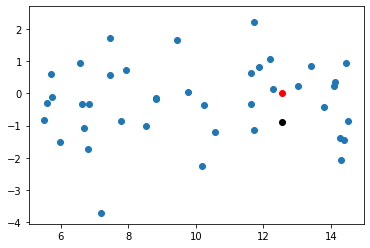

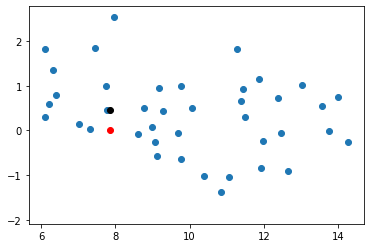

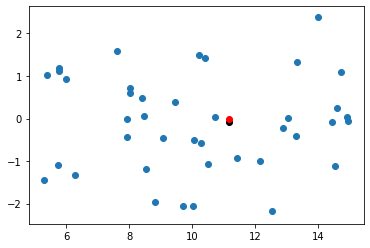

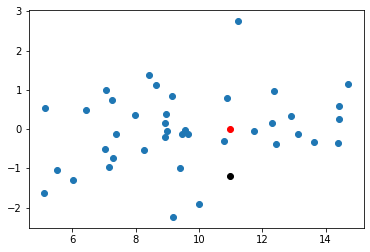

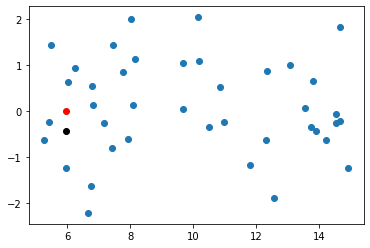

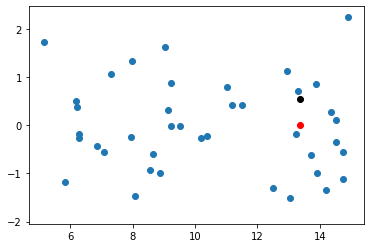

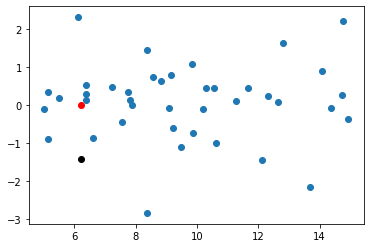

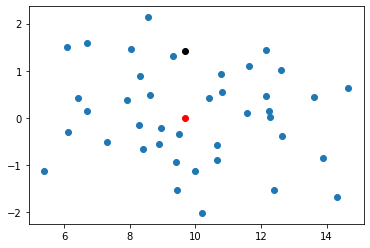

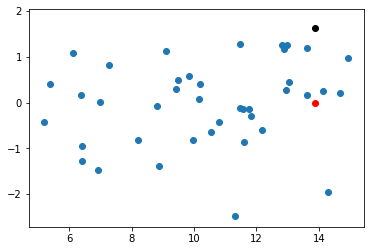

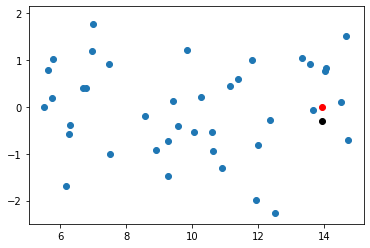

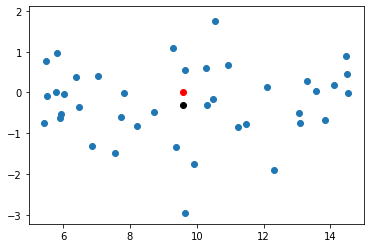

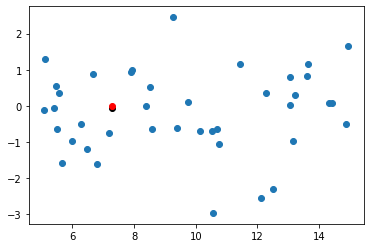

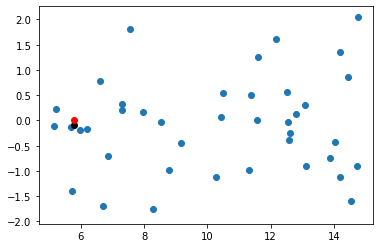

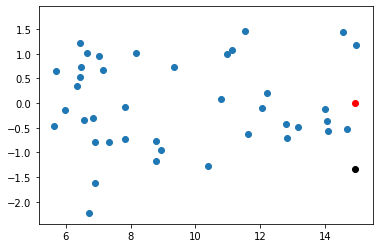

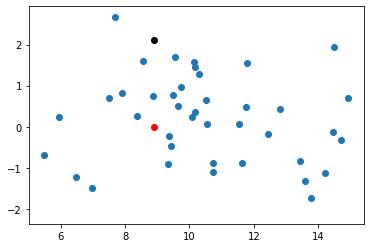

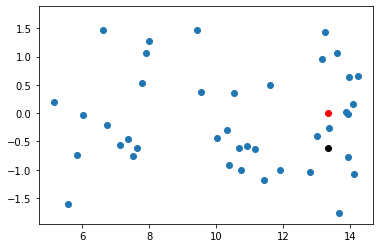

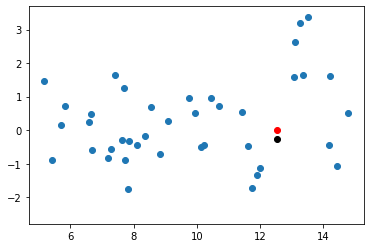

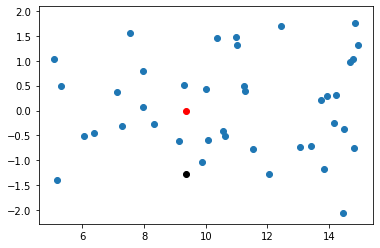

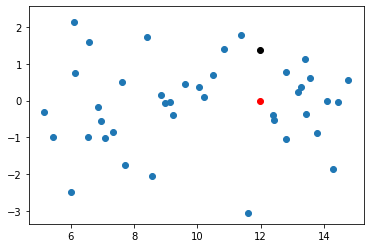

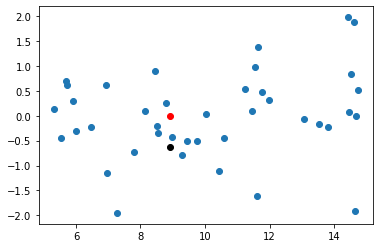

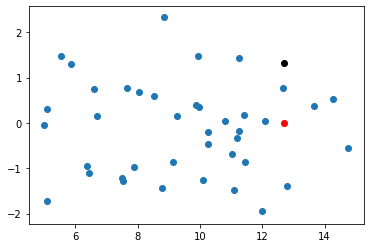

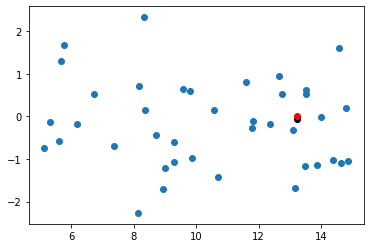

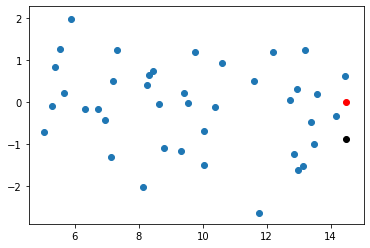

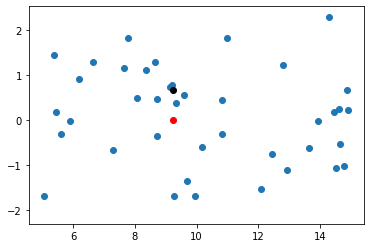

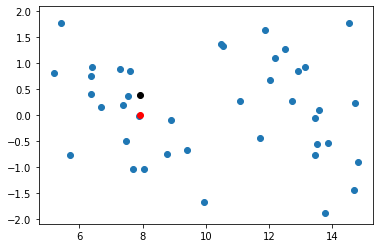

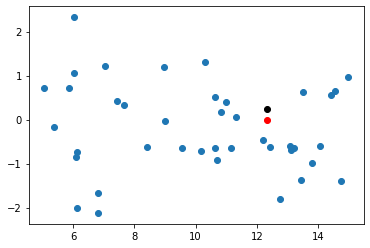

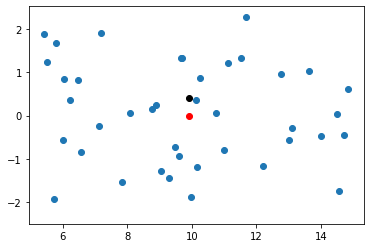

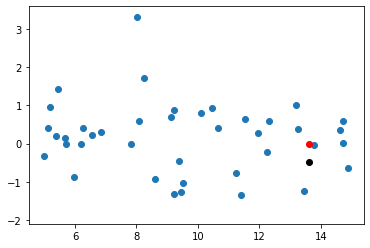

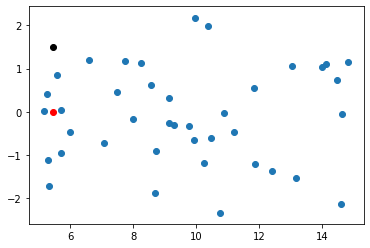

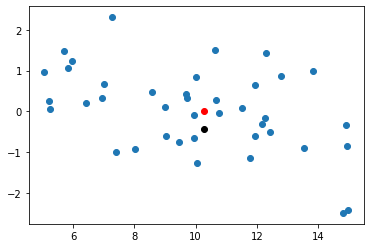

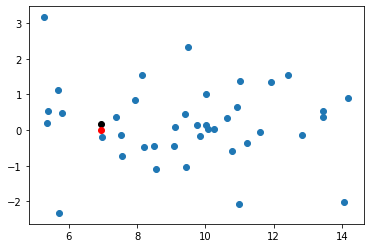

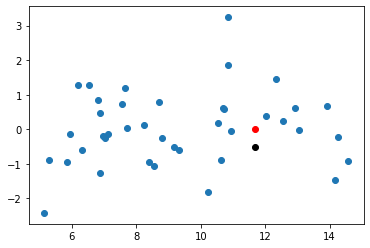

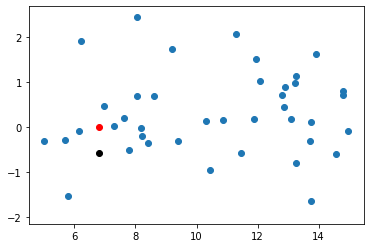

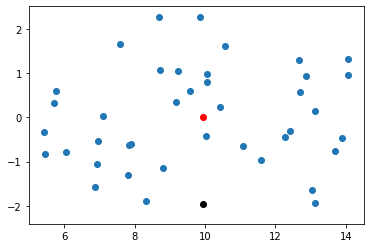

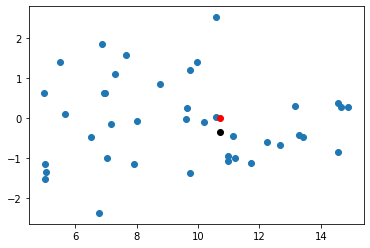

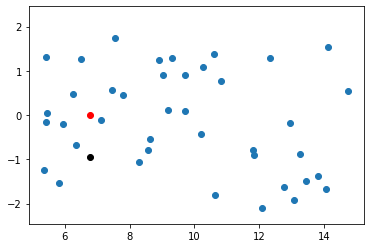

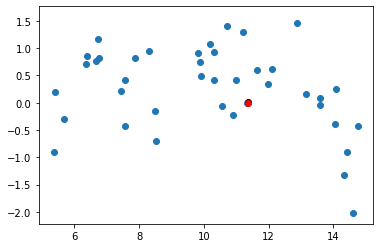

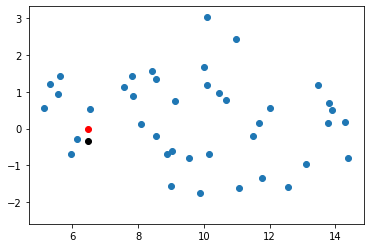

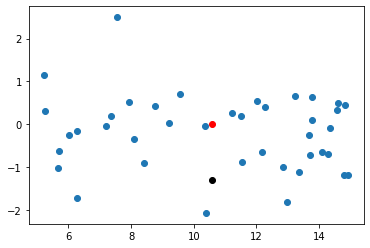

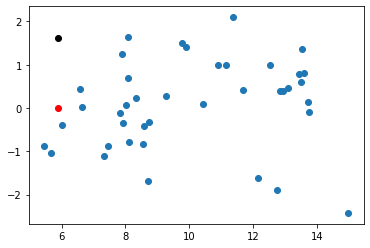

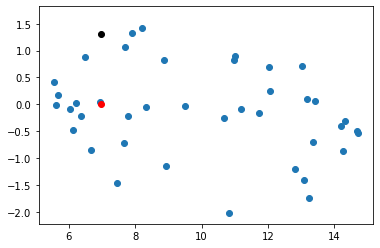

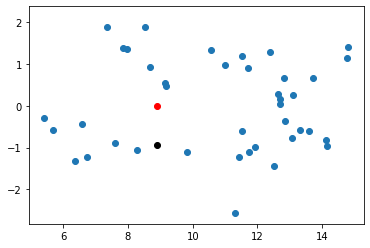

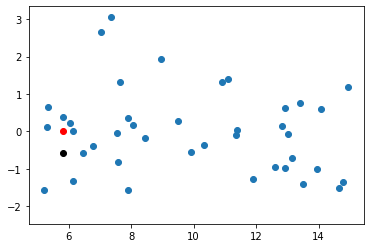

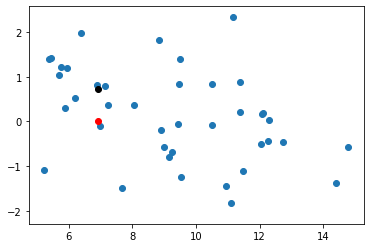

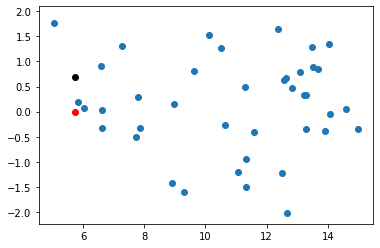

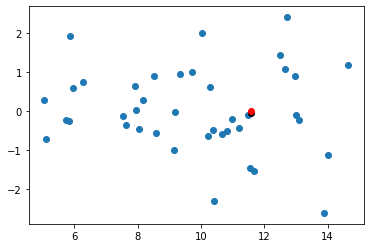

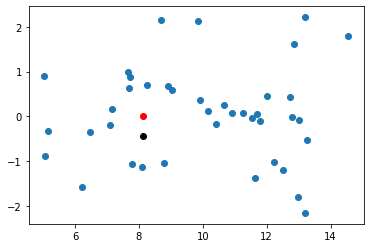

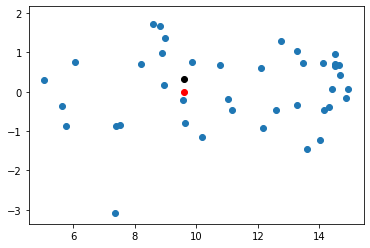

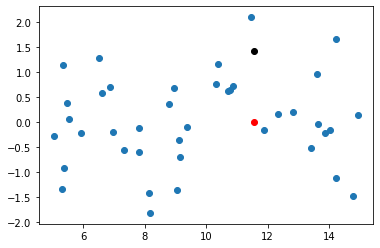

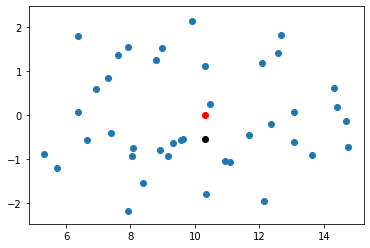

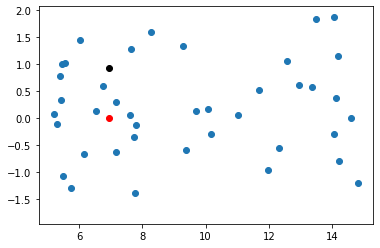

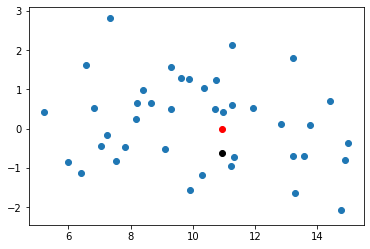

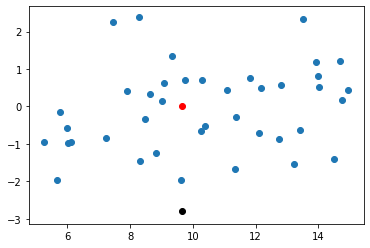

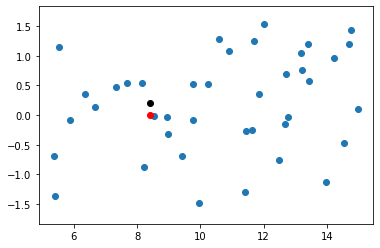

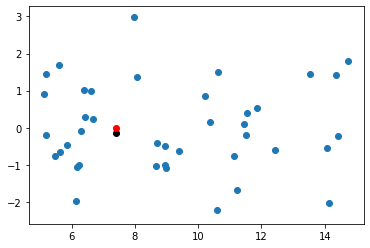

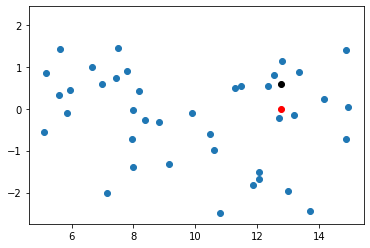

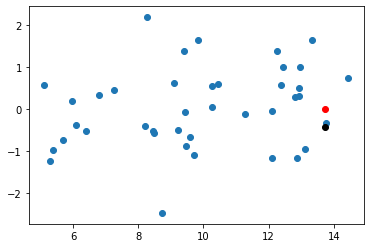

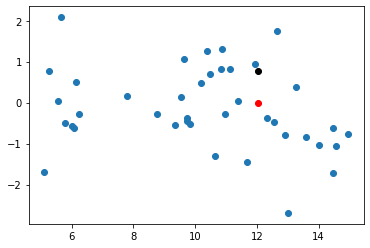

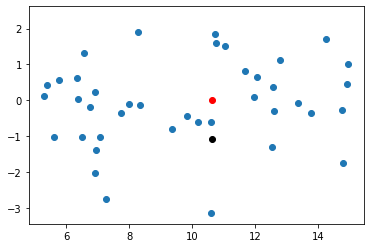

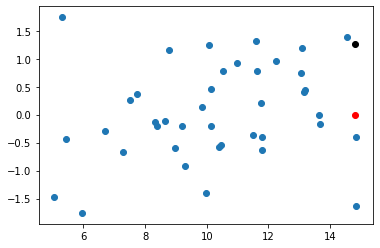

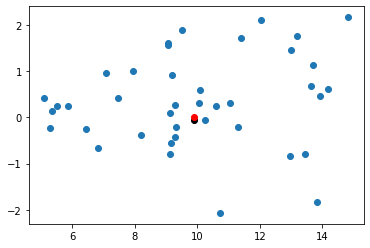

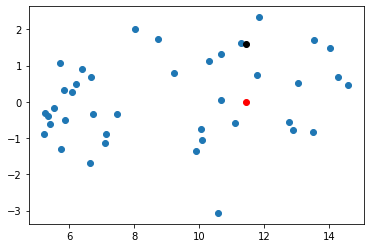

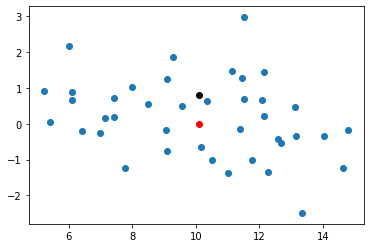

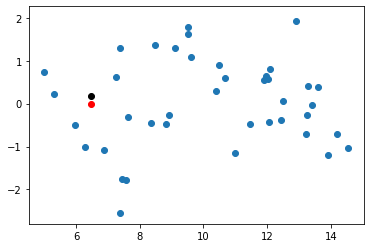

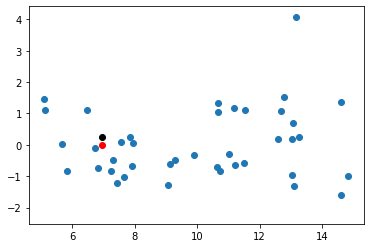

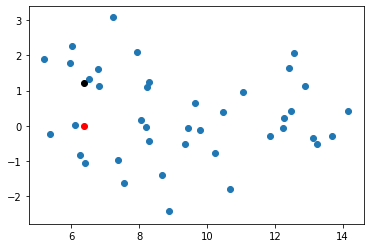

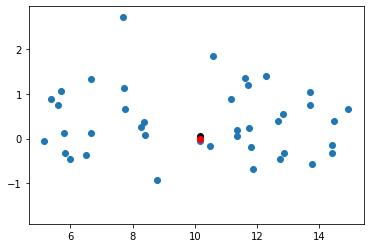

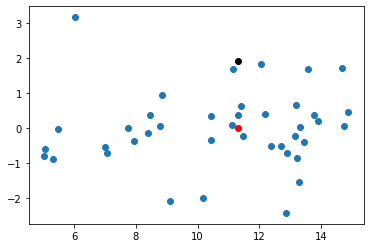

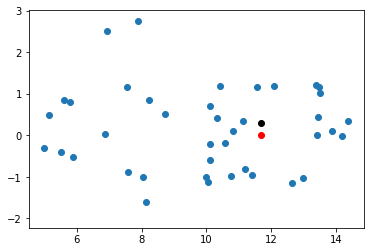

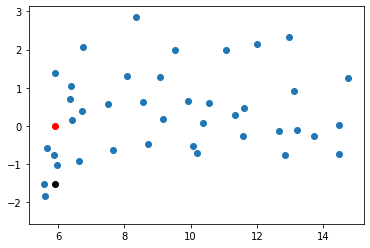

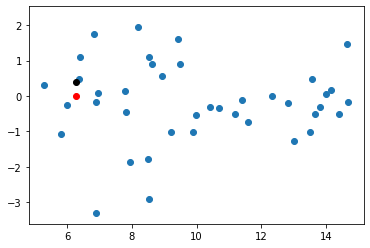

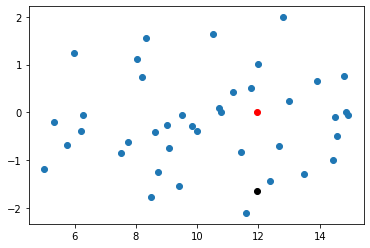

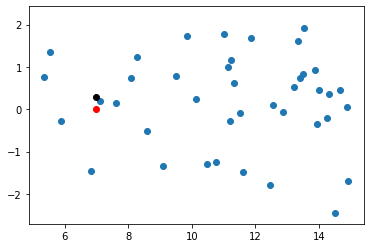

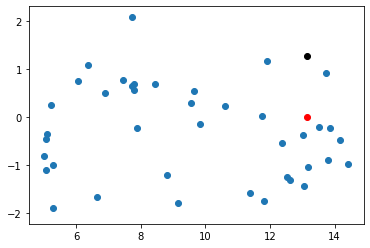

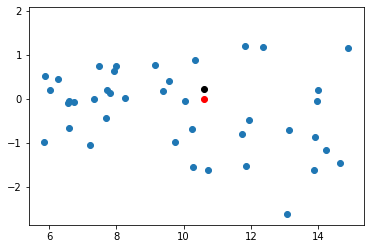

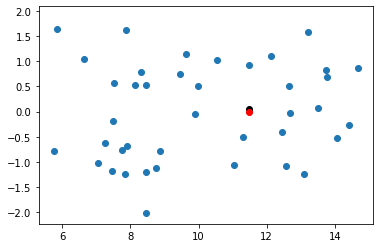

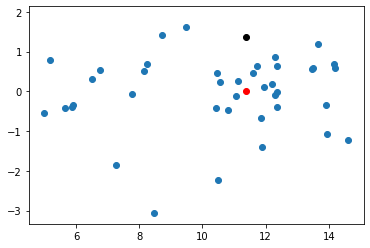

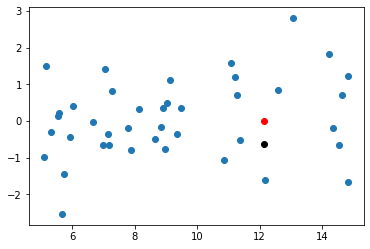

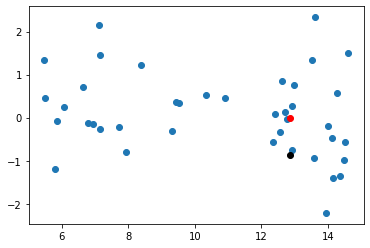

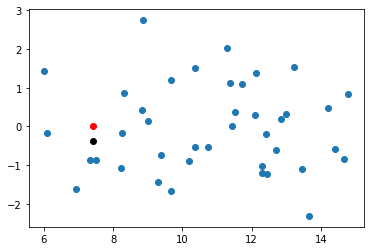

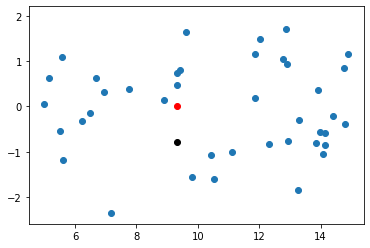

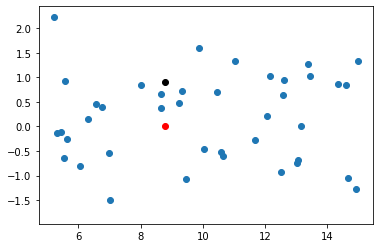

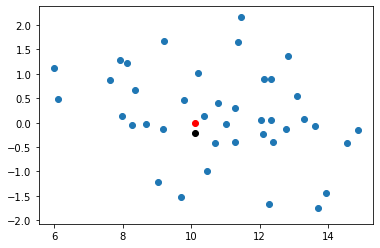

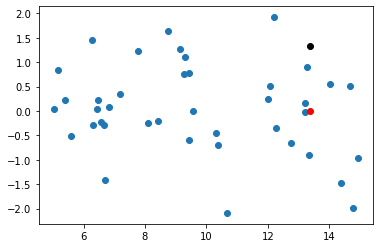

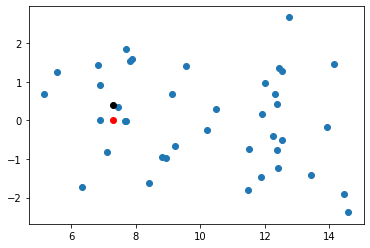

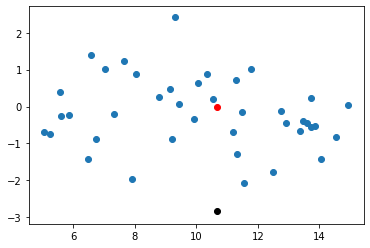

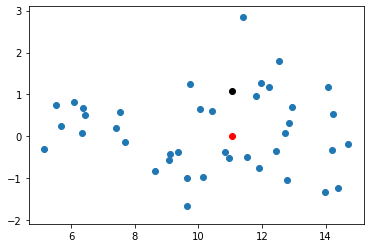

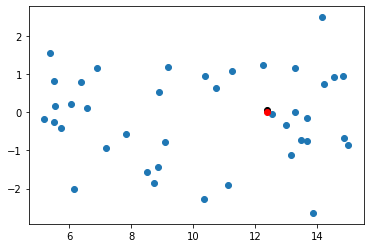

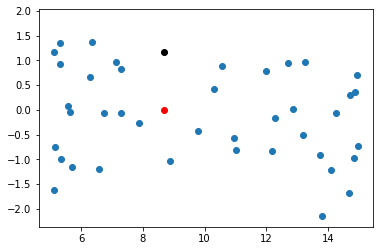

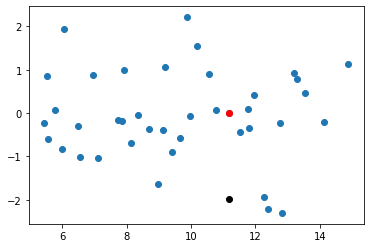

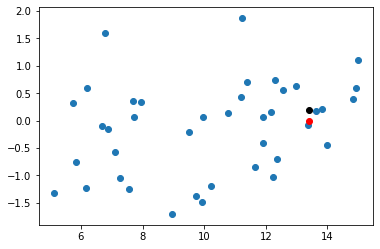

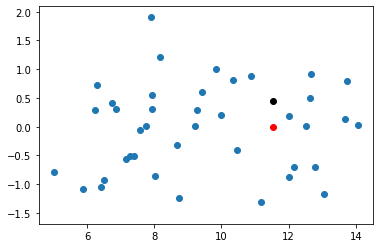

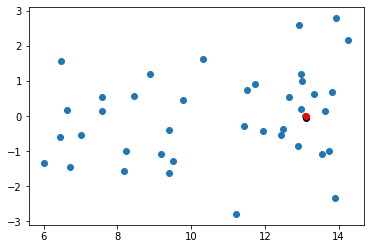

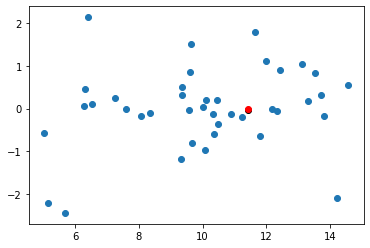

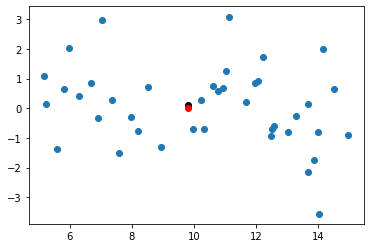

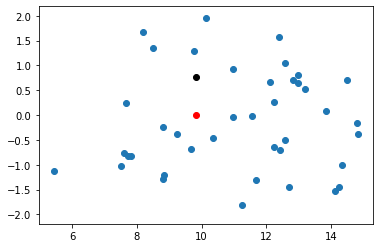

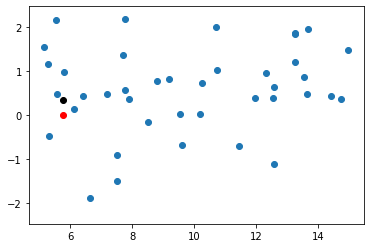

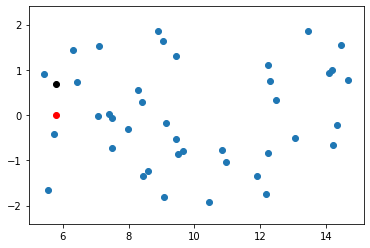

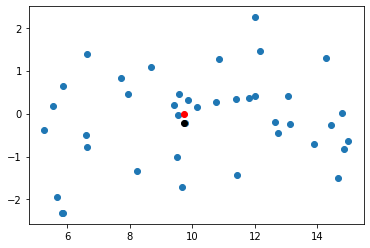

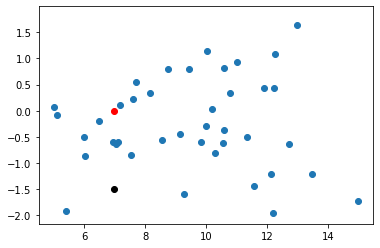

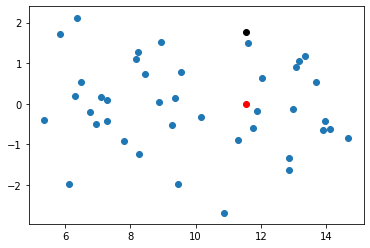

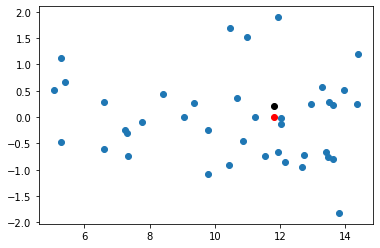

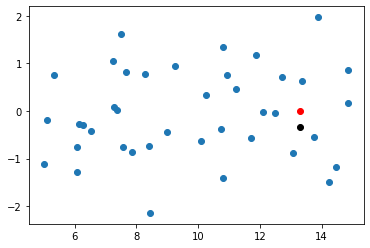

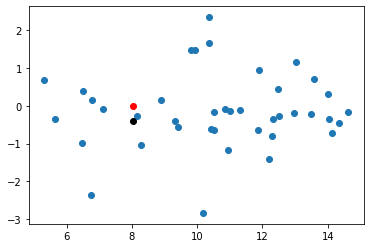

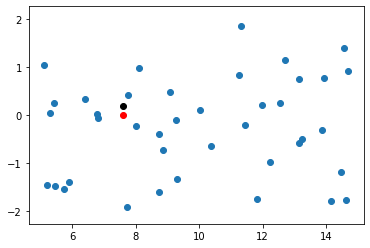

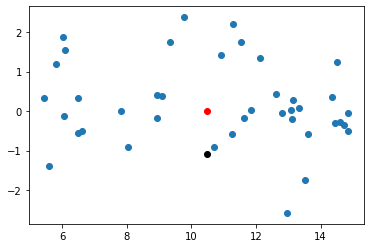

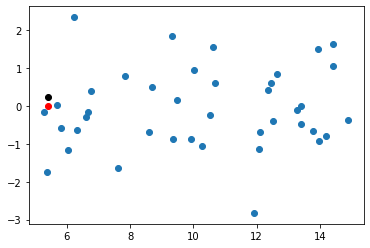

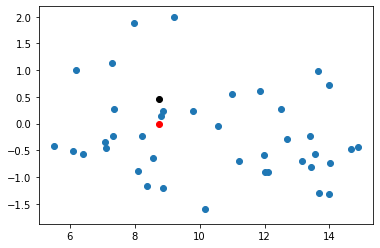

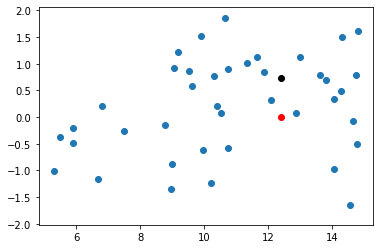

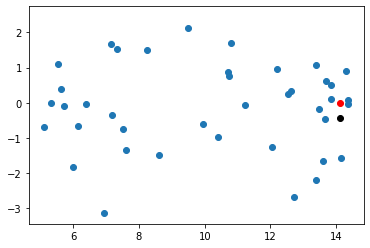

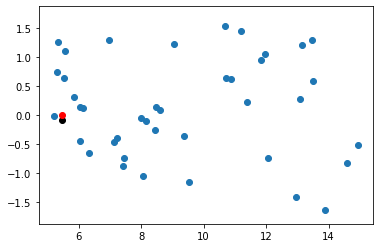

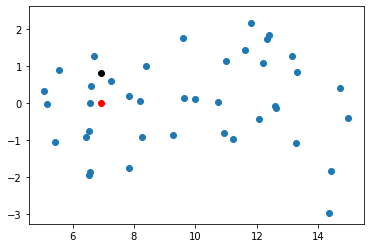

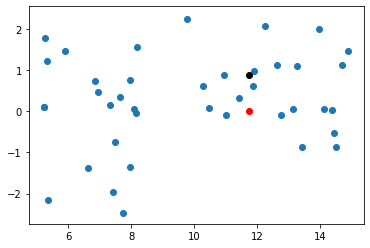

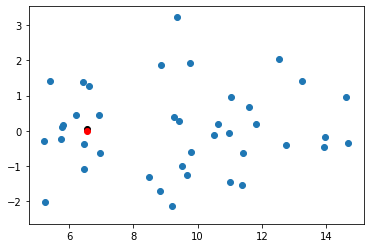

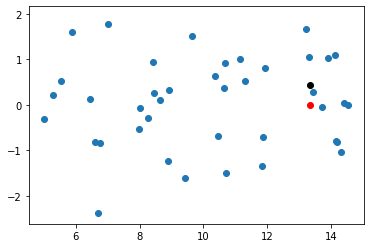

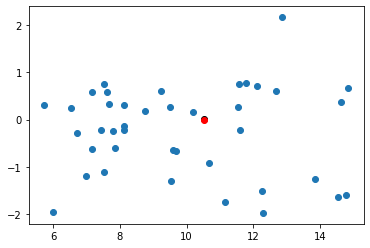

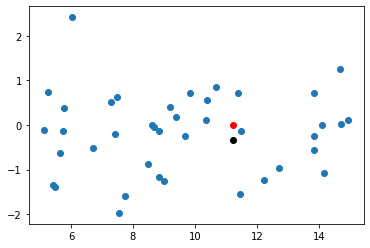

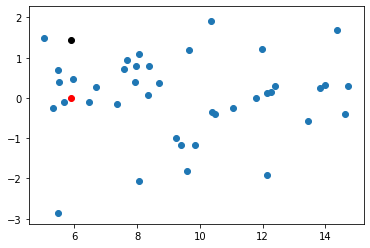

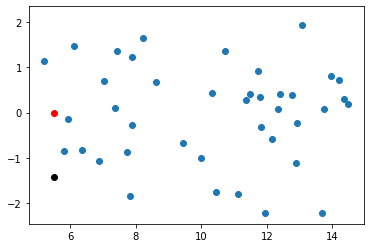

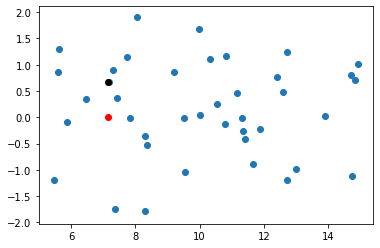

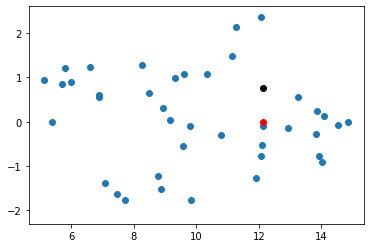

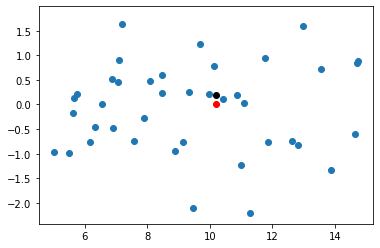

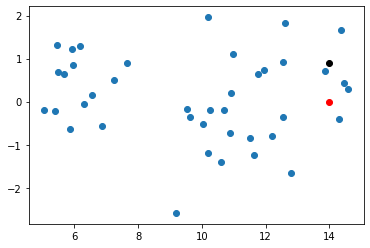

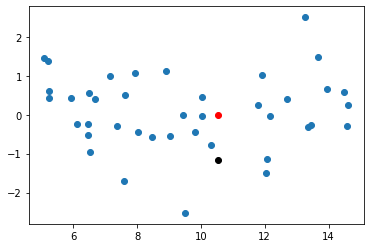

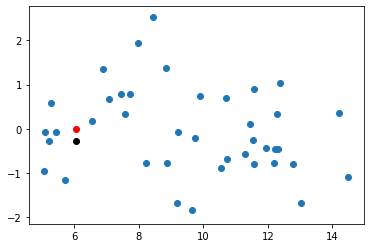

In [30]:
# GP independent sequence learning  
online = False; mse = 0; r_sq = 0
μ = []; σ = []
m = int(x_tr.shape[0] / 59)
for j in range(0, m):
    λ=np.exp(-1); ν=1;
    kernel = ν**2 * gp.kernels.RBF(length_scale=λ) #+ gp.kernels.WhiteKernel(noise_level=σ)
    model = gp.GaussianProcessRegressor(kernel=kernel)
    xx_tr =  x_tr.reshape(-1, 1)[(59 * j):(40 + 59 * j)]; yy_tr = y_tr.reshape(-1, 1)[(59 * j):(40 + 59 * j)]
    y_mean = np.mean(yy_tr)
    plt.scatter(xx_tr, yy_tr)
    model.fit(xx_tr, yy_tr)
    if online:
        pass
    else: 
        xx_te = x_tr.reshape(-1, 1)[(40 + 59 * j)]
        yy_te = y_tr.reshape(-1, 1)[(40 + 59 * j)]
        plt.scatter(xx_te, yy_te, c='black')
        μ_te, σ_te = model.predict(xx_te.reshape(-1, 1) , return_std=True)
        plt.scatter(xx_te, μ_te, c='red')
        plt.fill_between(xx_te, μ_te.squeeze()-2*σ_te, μ_te.squeeze()+2*σ_te)
        plt.show()
        μ.append(μ_te); σ.append(σ_te)
        
    mse += (sum((yy_te - μ_te)**2))
    r_sq += (1 - (sum((yy_te - μ_te)**2) / sum((yy_te - y_mean)**2)))
mse *= (1/m) 
r_sq *= (1/m)

In [ ]:
### Extrapolation task:

In [29]:
np.save('/Users/omernivron/Downloads/x_tr', x_tr)
np.save('/Users/omernivron/Downloads/y_tr', y_tr)

In [39]:
np.mean(σ)

1.0183815300723553

In [40]:
mse

array([0.84926919])

In [41]:
r_sq

array([-19.24135871])